# **Loading DataSet**

In [2]:
# import necessary libraries and functions
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# importing layers from keras
from keras.layers import Dense, InputLayer
from keras.models import Sequential
# importing adam optimizer from keras optimizer module 
from keras.optimizers import Adam

# train_test_split to create training and validation set
from sklearn.model_selection import train_test_split
# accuracy_score to calculate the accuracy of predictions
from sklearn.metrics import accuracy_score

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [4]:
!unzip -uq "drive/My Drive/train_n.zip"

In [6]:
# read the data
data = pd.read_csv("train.csv")

In [7]:
# Create random number generator
seed = 42

In [ ]:
data.head()

,image_names,class
0,11413.jpg,1
1,9863.jpg,1
2,997.jpg,0
3,5950.jpg,0
4,10454.jpg,1


In [ ]:
# Distribution of classes in the dataset
data['class'].value_counts()

1    6174
0    6022
Name: class, dtype: int64

In [8]:
# empty list to store the images
X = []
# iterating over each image
for img_name in data.image_names:
  # loading the image using its name
  img = plt.imread('images/' + img_name)

  # saving each image in the list
  X.append(img)

# Converting the list of images into array
X = np.array(X)

# Storing the target variable in saperate variable
y = data['class'].values


In [ ]:
# Converting the list of images into array
X = np.array(X)

# Storing the target variable in saperate variable
y = data['class'].values

((12196, 224, 224, 3), (12196,))

In [ ]:
# shape of the image
X.shape, y.shape

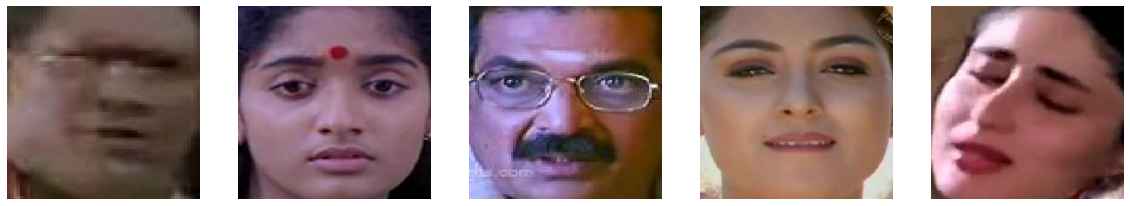

In [ ]:
# Visualizing images
fig,ax = plt.subplots(nrows=1, ncols=5,figsize=(20,20))
for i in range(5):
  ax[i].imshow(X[i*400])
  ax[i].axis('off')

# **Pre-Processing the data**

In [ ]:
# Convert 3 dimensional images into 1 dimensional
X = X.reshape(X.shape[0], 224*224*3)
X.shape

(12196, 150528)

In [ ]:
# Minimum and maximum pixel value of images
X.min(), X.max()  

(0, 255)

# **Creating tarining and validation set**

In [ ]:
# Creating training and validation set
X_train, X_valid, y_train, y_valid = train_test_split(X,y, test_size = 0.3, random_state= seed)

In [ ]:
# Shape of training and validation set
(X_train.shape, y_train.shape), (X_valid.shape, y_valid.shape)

(((8537, 150528), (8537,)), ((3659, 150528), (3659,)))

# **Defining the model architecture**

In [ ]:
# Defining the architecture of the model
model = Sequential()
model.add(InputLayer(input_shape=(X_train.shape[1],)))
model.add(Dense(100, activation='sigmoid'))
model.add(Dense(units=1, activation='sigmoid'))

In [ ]:
# Summary of the model
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 100)               15052900  
_________________________________________________________________
dense_20 (Dense)             (None, 1)                 101       
Total params: 15,053,001
Trainable params: 15,053,001
Non-trainable params: 0
_________________________________________________________________


# **Compiling the model**

In [ ]:
# Compling the model
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

# **Training the Model**

In [ ]:
# Training the model
model_history = model.fit(X_train,y_train, epochs=200, batch_size=128, validation_data=(X_valid,y_valid))

Epoch 1/200
67/67 [==============================] - 1s 21ms/step - loss: 0.6938 - accuracy: 0.5037 - val_loss: 0.6933 - val_accuracy: 0.4857
Epoch 2/200
67/67 [==============================] - 1s 18ms/step - loss: 0.6931 - accuracy: 0.5113 - val_loss: 0.6927 - val_accuracy: 0.5157
Epoch 3/200
67/67 [==============================] - 1s 18ms/step - loss: 0.6930 - accuracy: 0.5047 - val_loss: 0.6934 - val_accuracy: 0.4862
Epoch 4/200
67/67 [==============================] - 1s 18ms/step - loss: 0.6935 - accuracy: 0.5060 - val_loss: 0.6928 - val_accuracy: 0.5160
Epoch 5/200
67/67 [==============================] - 1s 18ms/step - loss: 0.6930 - accuracy: 0.5061 - val_loss: 0.6925 - val_accuracy: 0.5157
Epoch 6/200
67/67 [==============================] - 1s 18ms/step - loss: 0.6929 - accuracy: 0.5039 - val_loss: 0.6925 - val_accuracy: 0.5160
Epoch 7/200
67/67 [==============================] - 1s 17ms/step - loss: 0.6931 - accuracy: 0.5095 - val_loss: 0.6935 - val_accuracy: 0.4846
Epoch 

# **Evaluating model performance**

In [ ]:
# Accuracy on validation set
from sklearn.metrics import accuracy_score
print('Accuracy on validation set:', accuracy_score(y_valid, model.predict_classes(X_valid)[:,0]), '%')

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
Accuracy on validation set: 0.5195408581579667 %


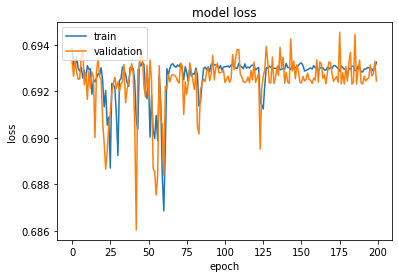

In [ ]:
# Summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc = 'upper left')
plt.show()

# **Increasing hidden layer**

In [ ]:
# Defining the architecture of the model
model = Sequential()
model.add(InputLayer(input_shape=(X_train.shape[1],)))
model.add(Dense(100, activation='sigmoid'))
model.add(Dense(100, activation='sigmoid'))
model.add(Dense(units=1, activation='sigmoid'))

# Compling the model
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 100)               15052900  
_________________________________________________________________
dense_22 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_23 (Dense)             (None, 1)                 101       
Total params: 15,063,101
Trainable params: 15,063,101
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Training the model
model_history = model.fit(X_train,y_train, epochs=100, batch_size=128, validation_data=(X_valid,y_valid))

Epoch 1/100
67/67 [==============================] - 1s 19ms/step - loss: 0.6932 - accuracy: 0.4982 - val_loss: 0.6926 - val_accuracy: 0.5165
Epoch 2/100
67/67 [==============================] - 1s 18ms/step - loss: 0.6931 - accuracy: 0.4956 - val_loss: 0.6928 - val_accuracy: 0.5176
Epoch 3/100
67/67 [==============================] - 1s 18ms/step - loss: 0.6933 - accuracy: 0.4923 - val_loss: 0.6928 - val_accuracy: 0.5176
Epoch 4/100
67/67 [==============================] - 1s 18ms/step - loss: 0.6931 - accuracy: 0.5040 - val_loss: 0.6934 - val_accuracy: 0.4865
Epoch 5/100
67/67 [==============================] - 1s 18ms/step - loss: 0.6933 - accuracy: 0.4942 - val_loss: 0.6926 - val_accuracy: 0.5165
Epoch 6/100
67/67 [==============================] - 1s 17ms/step - loss: 0.6931 - accuracy: 0.5044 - val_loss: 0.6935 - val_accuracy: 0.4865
Epoch 7/100
67/67 [==============================] - 1s 18ms/step - loss: 0.6932 - accuracy: 0.5057 - val_loss: 0.6930 - val_accuracy: 0.4884
Epoch 

In [ ]:
# Accuracy on Training set
from sklearn.metrics import accuracy_score
print('Accuracy on Training set:', accuracy_score(y_train, model.predict_classes(X_train)[:,0]), '%')

Accuracy on Training set: 0.5053297411268596 %


In [ ]:
# Accuracy on validation set
from sklearn.metrics import accuracy_score
print('Accuracy on validation set:', accuracy_score(y_valid, model.predict_classes(X_valid)[:,0]), '%')

Accuracy on validation set: 0.5181743645804865 %


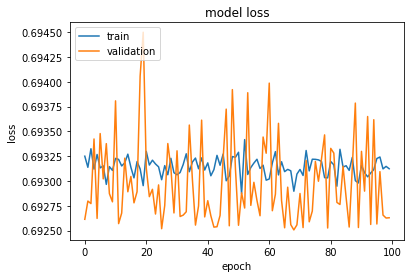

In [ ]:
# Summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc = 'upper left')
plt.show()

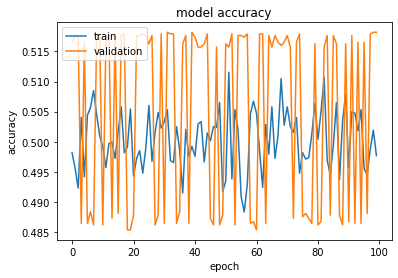

In [ ]:
# Summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc = 'upper left')
plt.show()